# Machine Learning e RoboCup


# Importação das bibliotecas

In [14]:
!pip -q install plotly --upgrade

In [15]:
!pip -q install yellowbrick

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Exploração dos dados

In [17]:
base_robocup = pd.read_csv('./data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/.data.csv'

In [ ]:
base_robocup

,distancia_do_gol,oponentes_no_campo_de_visao,companheiros_no_campo_de_visao,stamina,forca_do_Chute,chute_direcao,gol
0,5,1,3,80,65,C,0
1,8,2,2,75,70,E,0
2,10,4,3,70,62,D,0
3,4,1,2,85,58,C,0
4,12,3,4,90,70,D,1
...,...,...,...,...,...,...,...
374,7,0,3,77,69,D,0
375,9,2,3,86,71,E,1
376,6,1,2,75,68,D,0
377,11,2,1,70,63,D,0


### Visualizando os dados

In [ ]:
np.unique(base_robocup['gol'], return_counts=True)

(array([0, 1]), array([278, 101]))

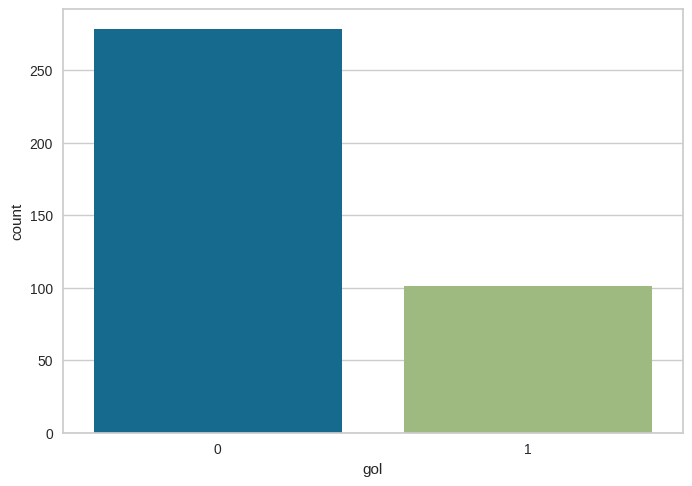

In [ ]:
sns.countplot(x=base_robocup['gol']);

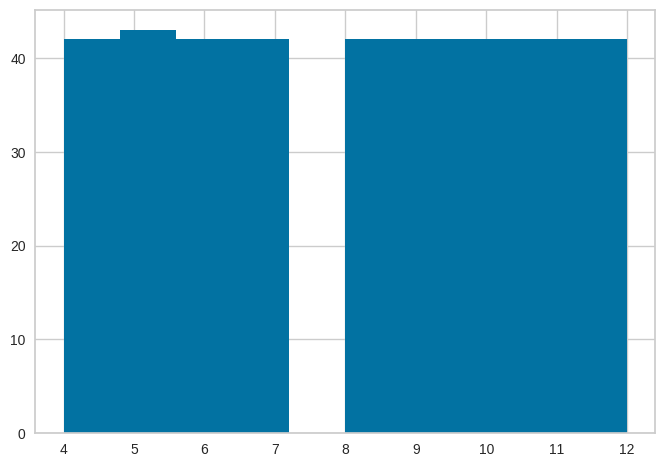

In [ ]:
plt.hist(x = base_robocup['distancia_do_gol']);

In [ ]:
# Gráfico de dispersão
grafico = px.scatter_matrix(base_robocup, dimensions=['distancia_do_gol', 'forca_do_Chute', 'stamina'], color='gol') # color=default separa uma cor para cada valor do campo default
grafico.show()

### Divisão entre previsores e classe

#### Tratamento de atributos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crie uma instância do LabelEncoder
encoder = LabelEncoder()
print(base_robocup['chute_direcao'])

# Ajuste e transforme os dados categóricos
dados_categoricos_transformados = encoder.fit_transform(base_robocup['chute_direcao'])
base_robocup['chute_direcao'] = dados_categoricos_transformados

print(base_robocup['chute_direcao'])

0       C
1       E
2       D
3       C
4       D
       ..
374     D
375     E
376     D
377     D
378     E
Name: chute_direcao, Length: 379, dtype: object
0      0
1      2
2      1
3      0
4      1
      ..
374    1
375    2
376    1
377    1
378    2
Name: chute_direcao, Length: 379, dtype: int64


In [ ]:
X_robocup = base_robocup.iloc[:, :6].values
X_robocup

array([[ 5,  1,  3, 80, 65,  0],
       [ 8,  2,  2, 75, 70,  2],
       [10,  4,  3, 70, 62,  1],
       ...,
       [ 6,  1,  2, 75, 68,  1],
       [11,  2,  1, 70, 63,  1],
       [ 5,  3,  3, 81, 68,  2]])

In [ ]:
# Busca todas as linhas  do atributo 4(coluna default)
y_robocup = base_robocup.iloc[:, 6].values
y_robocup

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

### Escalonamento dos valores


In [ ]:
X_robocup

array([[ 5,  1,  3, 80, 65,  0],
       [ 8,  2,  2, 75, 70,  2],
       [10,  4,  3, 70, 62,  1],
       ...,
       [ 6,  1,  2, 75, 68,  1],
       [11,  2,  1, 70, 63,  1],
       [ 5,  3,  3, 81, 68,  2]])

In [ ]:
# Menoes valores
X_robocup[:,0].min(), X_robocup[:,1].min(), X_robocup[:,2].min()

(4, 0, 1)

In [ ]:
# Maiores valores
X_robocup[:,0].max(), X_robocup[:,1].max(), X_robocup[:,2].max()

(12, 4, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler # Pacote para realizar a padronização
scaler_credit = StandardScaler() # Padronizador
X_robocup = scaler_credit.fit_transform(X_robocup) # Aplicando a padronizador

In [ ]:
# Novos valores mimos
X_robocup[:,0].min(), X_robocup[:,1].min(), X_robocup[:,2].min()

(-1.5454214909402255, -1.6062229583424341, -1.413187525585212)

In [ ]:
# Novos valores máximos
X_robocup[:,0].max(), X_robocup[:,1].max(), X_robocup[:,2].max()

(1.5515500626161287, 1.8723970485820376, 1.4206647082602661)

In [ ]:
X_robocup

array([[-1.15830005, -0.73656796,  0.4760473 , -0.08681595, -0.54466402,
        -1.40334816],
       [ 0.00306429,  0.13308705, -0.46857011, -0.81155708,  0.57357901,
         1.21025849],
       [ 0.77730717,  1.87239705,  0.4760473 , -1.5362982 , -1.21560984,
        -0.09654484],
       ...,
       [-0.7711786 , -0.73656796, -0.46857011, -0.81155708,  0.1262818 ,
        -0.09654484],
       [ 1.16442862,  0.13308705, -1.41318753, -1.5362982 , -0.99196124,
        -0.09654484],
       [-1.15830005,  1.00274205,  0.4760473 ,  0.05813227,  0.1262818 ,
         1.21025849]])

### Seperando a base de treinamento e de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_robocup_treinamento, X_robocup_teste, y_robocup_treinamento, y_robocup_teste = train_test_split(X_robocup, y_robocup, test_size = 0.10, random_state = 0)

In [ ]:
X_robocup_treinamento.shape, y_robocup_treinamento.shape

((341, 6), (341,))

In [ ]:
X_robocup_treinamento.shape, y_robocup_treinamento.shape

((341, 6), (341,))

## Salvando os dados depois do preprocessamento


In [ ]:
import pickle

In [ ]:
with open('./robocup.pkl', mode = 'wb') as f:
  pickle.dump([X_robocup_treinamento, y_robocup_treinamento, X_robocup_teste, y_robocup_teste], f)

### Carregando dados preprocessados

In [ ]:
with open(f'./robocup.pkl', 'rb') as f:
  X_robocup_treinamento, y_robocup_treinamento, X_robocup_teste, y_robocup_teste = pickle.load(f)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # Classes que repreenta o naive bayes

In [ ]:
X_robocup_treinamento.shape, y_robocup_treinamento.shape

((341, 6), (341,))

In [ ]:
X_robocup_teste.shape, y_robocup_teste.shape

((38, 6), (38,))

In [ ]:
# Gerando a tabela de probabilidade
naive_robocup = GaussianNB()
naive_robocup.fit(X_robocup_treinamento, y_robocup_treinamento)

# Aplicando o modelo na base de teste
previsoes = naive_robocup.predict(X_robocup_teste)
previsoes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
# Respostas corretas da base de dados
y_robocup_teste

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
accuracy_score(y_robocup_teste, previsoes) # não executar o escalonamento

0.9736842105263158

0.9736842105263158

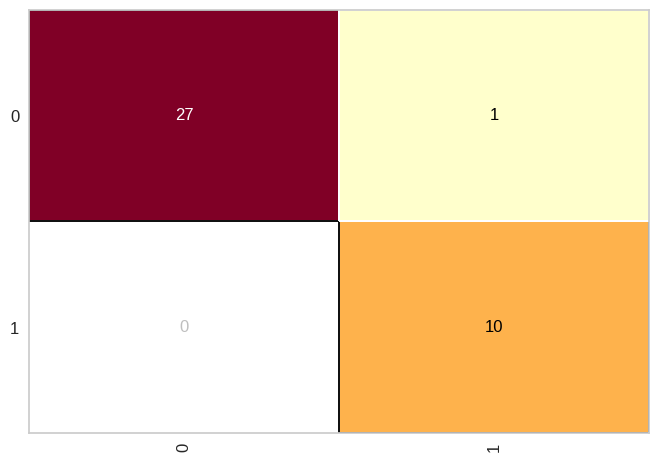

In [ ]:
cm = ConfusionMatrix(naive_robocup)
cm.fit(X_robocup_treinamento, y_robocup_treinamento)
cm.score(X_robocup_teste, y_robocup_teste)

In [ ]:
print(classification_report(y_robocup_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando e treinando a árvore de decisão
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_robocup_treinamento, y_robocup_treinamento) # O fit recebe os atributos previsores e a classe

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Aplicando o modelo na base de teste
previsoes = arvore_credit.predict(X_robocup_teste)
previsoes # Dados gerados pelo modelo

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
# Dados corretos da base de teste
y_robocup_teste

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
accuracy_score(y_robocup_teste, previsoes)

1.0

In [ ]:
# Matriz de confunção
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_robocup_treinamento, y_robocup_treinamento)
cm.score(X_robocup_teste, y_robocup_teste)

NameError: name 'arvore_credit' is not defined

In [ ]:
# Metricas do modelo
print(classification_report(y_robocup_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
# Valores do atributo classe
arvore_credit.classes_

array([0, 1])

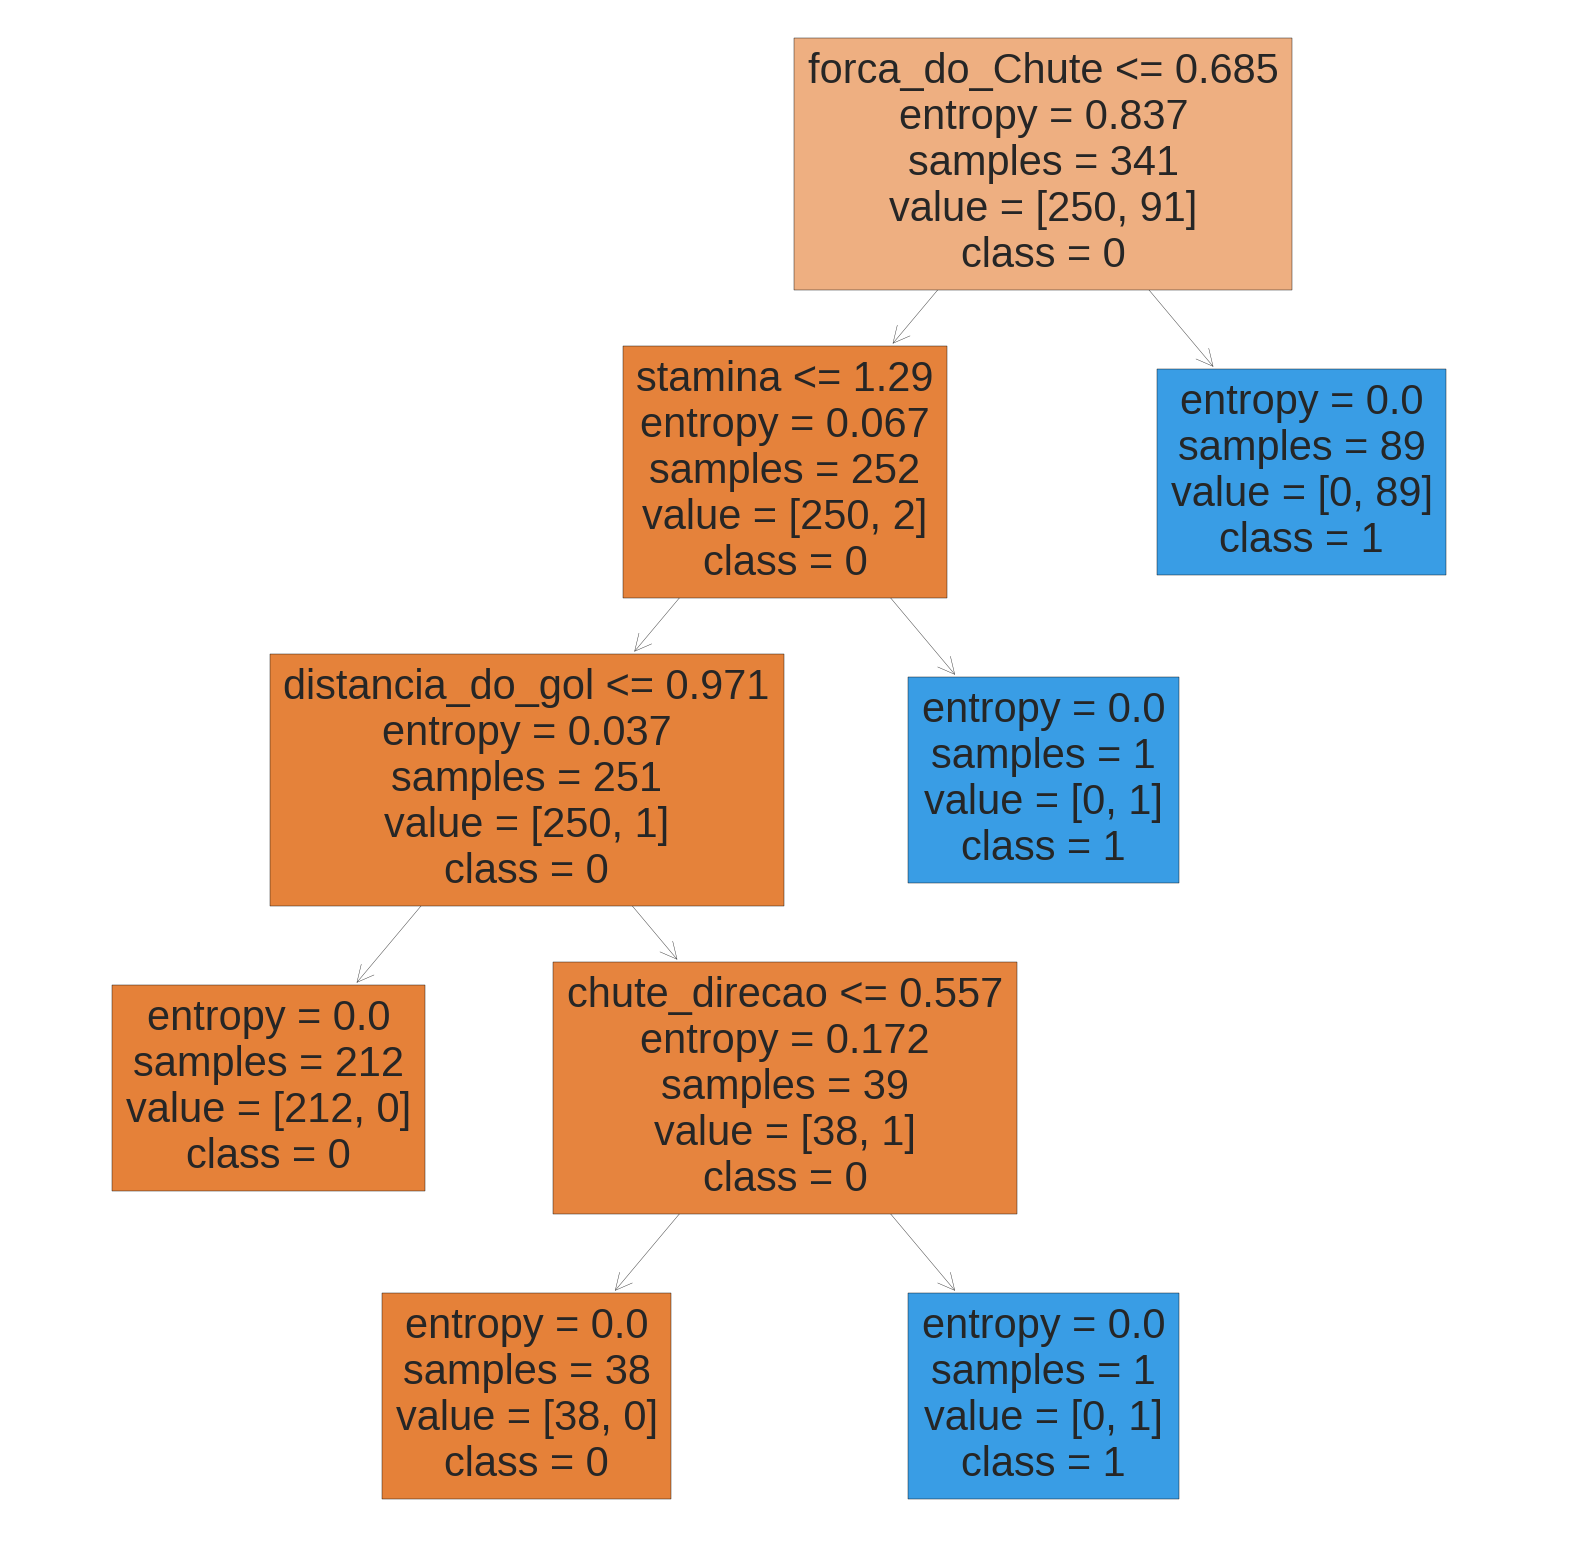

In [ ]:
# Visualizando a árvore de decisão
from sklearn import tree
previsores = ["distancia_do_gol","oponentes_no_campo_de_visao","companheiros_no_campo_de_visao","stamina","forca_do_Chute","chute_direcao"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png') # Salvando a png da árvore

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_robocup = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_robocup.fit(X_robocup_treinamento, y_robocup_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
# Aplicando o modelo de random forest
previsoes = random_forest_robocup.predict(X_robocup_teste)
previsoes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
y_robocup_teste

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
accuracy_score(y_robocup_teste, previsoes)

1.0

1.0

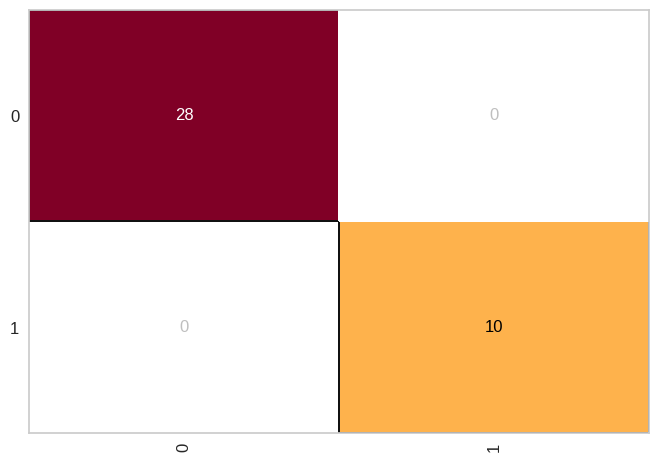

In [ ]:
cm = ConfusionMatrix(random_forest_robocup)
cm.fit(X_robocup_treinamento, y_robocup_treinamento)
cm.score(X_robocup_teste, y_robocup_teste)

In [ ]:
print(classification_report(y_robocup_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_robocup_teste.shape, y_robocup_teste.shape

((38, 6), (38,))

In [ ]:
rede_neural_robocup = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_robocup.fit(X_robocup_treinamento, y_robocup_treinamento)

Iteration 1, loss = 0.79271775
Iteration 2, loss = 0.77213950
Iteration 3, loss = 0.75306168
Iteration 4, loss = 0.73445968
Iteration 5, loss = 0.71656598
Iteration 6, loss = 0.69911195
Iteration 7, loss = 0.68223774
Iteration 8, loss = 0.66621291
Iteration 9, loss = 0.65081002
Iteration 10, loss = 0.63632910
Iteration 11, loss = 0.62228107
Iteration 12, loss = 0.60915785
Iteration 13, loss = 0.59643707
Iteration 14, loss = 0.58395126
Iteration 15, loss = 0.57189252
Iteration 16, loss = 0.55999770
Iteration 17, loss = 0.54807321
Iteration 18, loss = 0.53648998
Iteration 19, loss = 0.52489733
Iteration 20, loss = 0.51345771
Iteration 21, loss = 0.50215080
Iteration 22, loss = 0.49102276
Iteration 23, loss = 0.47971367
Iteration 24, loss = 0.46844357
Iteration 25, loss = 0.45731180
Iteration 26, loss = 0.44612094
Iteration 27, loss = 0.43500202
Iteration 28, loss = 0.42370758
Iteration 29, loss = 0.41239275
Iteration 30, loss = 0.40110017
Iteration 31, loss = 0.38958309
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_robocup.predict(X_robocup_teste)
previsoes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
y_robocup_teste

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
accuracy_score(y_robocup_teste, previsoes)

1.0

1.0

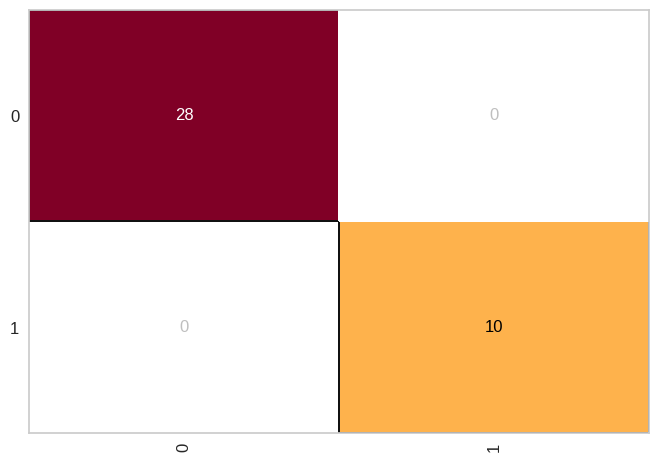

In [ ]:
cm = ConfusionMatrix(rede_neural_robocup)
cm.fit(X_robocup_treinamento, y_robocup_treinamento)
cm.score(X_robocup_teste, y_robocup_teste)

In [ ]:
print(classification_report(y_robocup_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

